### GW tutorial 2: Detector noise and GW150914

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Author: Melissa Lopez

Email: m.lopez@uu.nl

Note that we are importing some packages to be able to read the data.

In [ ]:
!pip install pycbc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 24.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [ ]:
%matplotlib inline
from pycbc.catalog import Merger
import pycbc.psd
import pylab
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.11/dist-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


In the previous part we have seen the detector response to gravitational waves (GW). Currently, we have three ground-based detectors: LIGO Hanford (H1), LIGO Livingston (L1) and Virgo (V1). But what does the data actually look like?

To answer this question we are going to take a look at the first detection: **GW150914**. Let's load the data from L1

In [ ]:
m = Merger('GW150914')
ifo = 'L1'
data = m.strain(ifo)

**Exercise 1:** We can see that this object is a PyCBC timeseries, and as such you can check what their atributes are (see [here](https://pycbc.org/pycbc/latest/html/pycbc.types.html#module-pycbc.types.timeseries)). Let's check some of them.

- How much is the duration of the time series?

- How much is its sampling rate?

- How many data points does it have?

- How much is $\Delta_{f}$ and $\Delta_{t}$? Can you find a relation between these and the number of data points?

_Hint:_ $\Delta_{f} = 1/duration$ and  $\Delta_{t} = 1/sample\_rate$

In [ ]:
# prompt: In the previous part we have seen the detector response to gravitational waves (GW). Currently, we have three ground-based detectors: LIGO Hanford (H1), LIGO Livingston (L1) and Virgo (V1). But what does the data actually look like?
# To answer this question we are going to take a look at the first detection: GW150914. Let's load the data from L1
# Exercise 1: We can see that this object is a PyCBC timeseries, and as such you can check what their atributes are (see here). Let's check some of them.
#     How much is the duration of the time series?
#     How much is its sampling rate?
#     How many data points does it have?
#     How much is Δf and Δt? Can you find a relation between these and the number of data points?
# Hint: Δf=1/duration and Δt=1/sample_rate

print(f"Duration of the time series: {data.duration}")
print(f"Sampling rate: {data.sample_rate}")
print(f"Number of data points: {len(data)}")

delta_f = 1/data.duration
delta_t = 1/data.sample_rate

print(f"Delta f (Δf): {delta_f}")
print(f"Delta t (Δt): {delta_t}")

print(f"Relation check: delta_f * data.duration = {delta_f * data.duration}") # Should be approximately 1
print(f"Relation check: delta_t * data.sample_rate = {delta_t * data.sample_rate}") # Should be approximately 1


Duration of the time series: 32.0
Sampling rate: 4096.0
Number of data points: 131072
Delta f (Δf): 0.03125
Delta t (Δt): 0.000244140625
Relation check: delta_f * data.duration = 1.0
Relation check: delta_t * data.sample_rate = 1.0


The previous magnitudes are key parameters of the timeseries. Now, let's plot the actual data to see what it looks like.

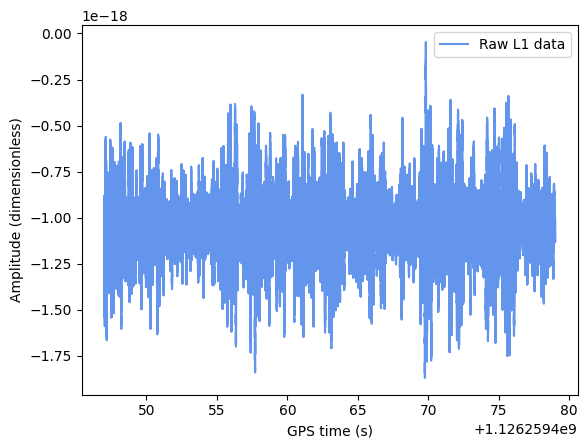

In [ ]:
plt.plot(data.sample_times, data, label='Raw L1 data', color='cornflowerblue')
plt.xlabel('GPS time (s)')
plt.ylabel('Amplitude (dimensionless)')
plt.legend()

In GW we use the GPS time to determine at what time the GW signals reached Earth. You can see that the amplitude of this data is super small, $\mathcal{O}(10^{-18})$! GW interferometers are able to detect a change in distance of ~1/10,000th the size of a proton.

But, where is GW190514? We cannot see it (yet) as there are many different contributions from the detector. The detector has a given "noise budget" given  by the power spectral density (PSD), $S_{n}(f)$, according to its specific design.

**Exercise 2**: Estimate the PSD of the data using `filter_psd` (see [here](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.filter_psd)) and plot it. Limit your plot according to the minimum frequency (say, 1 Hz) and  the Nyquist frequency.

_Hint_: Note that the PSD is a frequency series.

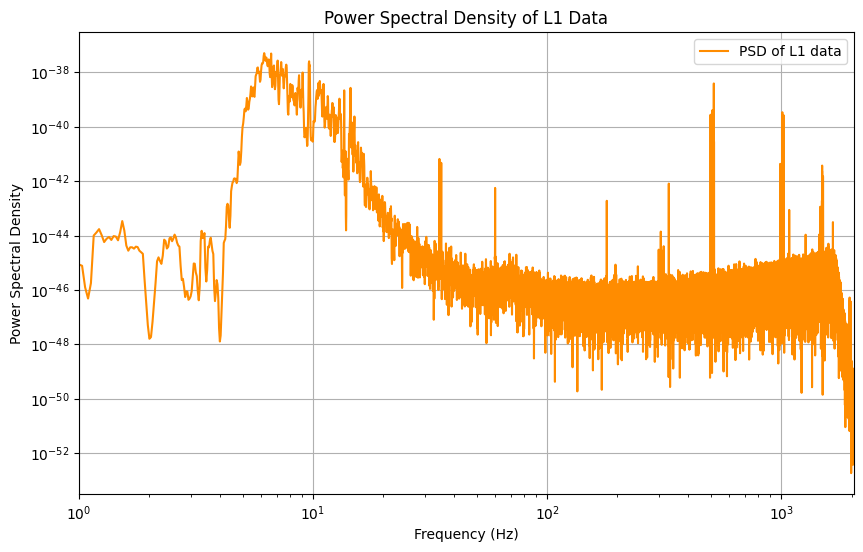

In [ ]:
# prompt: Exercise 2: Estimate the PSD of the data using filter_psd (see here) and plot it. Limit your plot according to the minimum frequency (say, 1 Hz) and the Nyquist frequency.
# Hint: Note that the PSD is a frequency series.

# Estimate the PSD of the data
psd = data.filter_psd(data.duration , delta_f, 1)

# Define the minimum and maximum frequencies for plotting
fmin = 1
fmax = data.sample_rate / 2  # Nyquist frequency

# Extract frequencies and PSD values within the desired range
frequencies = psd.sample_frequencies
indices = np.where((frequencies >= fmin) & (frequencies <= fmax))
plot_frequencies = frequencies[indices]
plot_psd = psd[indices]

# Plot the PSD
plt.figure(figsize=(10, 6))
plt.loglog(plot_frequencies, plot_psd, label='PSD of L1 data', color='darkorange')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('Power Spectral Density of L1 Data')
plt.xlim(fmin, fmax)
plt.grid(True)
plt.legend()
plt.show()


The PSD shows us what are the different contributions of the detector noise.
While we computed the PSD from 1 Hz, you can see that there is a weird behaviour for frequencies < 5 Hz. This is because the detector is not calibrated at these frequencies, so our analysis needs to start at higher frequencies. For current ground based detectors, we usually start at 10 Hz or higher, depending on the source.

GW signals are tiny, so with this much noise we won't be able to see GW150914. To "flatten" all frequency contributions we whiten the data.

**Exercise 3:** We can whiten the data with [this](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.whiten) function. Use `segment_duration = 4` and `max_filter_duration=4`.

- Plot the whitened data next to the raw detector noise. What differences can you see?

- Estimate the PSD of the whitened data. Plot it in the same graph as the raw PSD. What differences can you see?


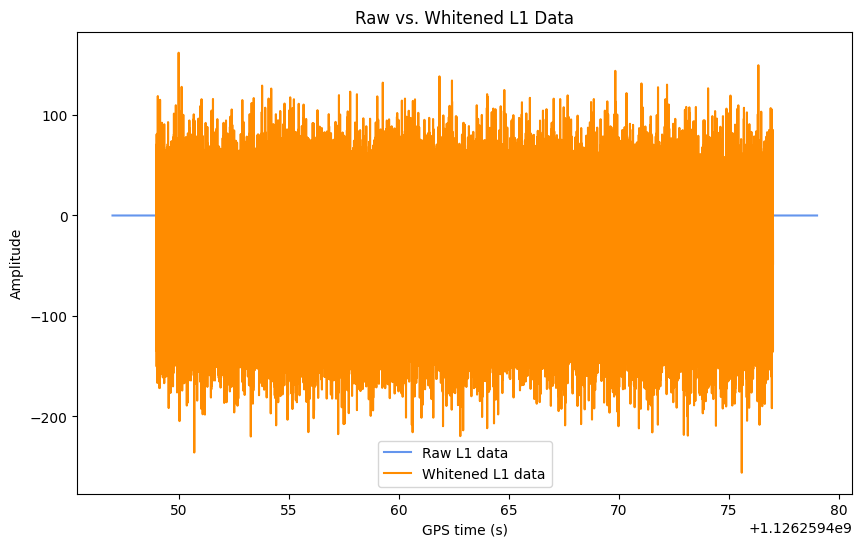

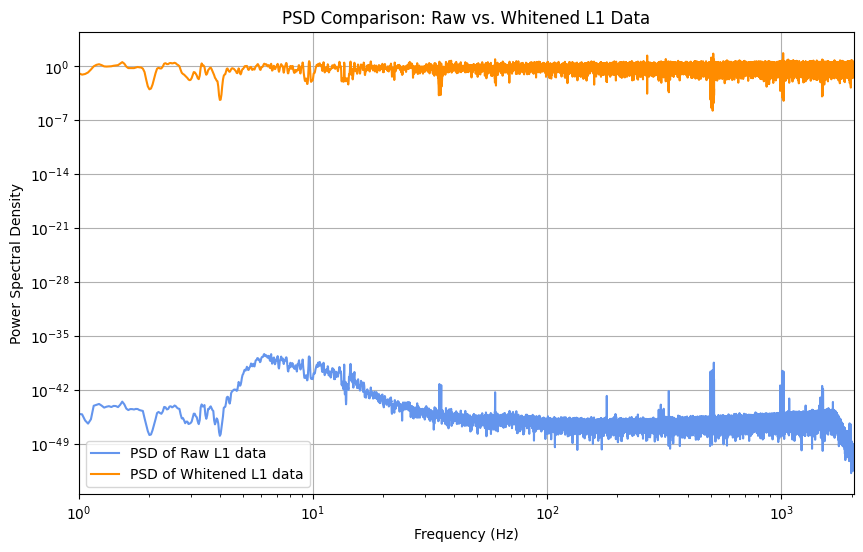

In [ ]:
# prompt: We can whiten the data with (We can whiten the data with this function. Use segment_duration = 4 and max_filter_duration=4.
#     Plot the whitened data next to the raw detector noise. What differences can you see?
#     Estimate the PSD of the whitened data. Plot it in the same graph as the raw PSD. What differences can you see?
# ) function. Use segment_duration = 4 and max_filter_duration=4.
#     Plot the whitened data next to the raw detector noise. What differences can you see?
#     Estimate the PSD of the whitened data. Plot it in the same graph as the raw PSD. What differences can you see?

# Whiten the data
whitened_data = data.whiten(4, 4)

# Plot the whitened data and the raw data
plt.figure(figsize=(10, 6))
plt.plot(data.sample_times, data, label='Raw L1 data', color='cornflowerblue')
plt.plot(whitened_data.sample_times, whitened_data, label='Whitened L1 data', color='darkorange')
plt.xlabel('GPS time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Raw vs. Whitened L1 Data')
plt.show()

# Estimate the PSD of the whitened data
whitened_psd = whitened_data.filter_psd(whitened_data.duration, delta_f, 1)

# Plot the PSDs of the raw and whitened data
plt.figure(figsize=(10, 6))
plt.loglog(plot_frequencies, plot_psd, label='PSD of Raw L1 data', color='cornflowerblue')
plt.loglog(plot_frequencies, whitened_psd[indices], label='PSD of Whitened L1 data', color='darkorange')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('PSD Comparison: Raw vs. Whitened L1 Data')
plt.xlim(fmin, fmax)
plt.grid(True)
plt.legend()
plt.show()


Now all frequency contributions are at the same level, as we can see from the PSD. However, GW150914 is still hidden in the data.


**Exercise 4:** We can apply a [low pass filter](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.lowpass_fir) and a [high pass filter](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.highpass_fir) to limit the frequency of the data. The low pass filters above 250 Hz (order=512) and the high pass filters below 30 Hz (order=512).

- Estimate the PSD of the bandpassed data and plot it together with the raw PSD and the whitened PSD. What is the bandpass doing?

- Plot the bandpassed data [cropping](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.crop) 12s on the left and 13s on the right. What can you see? Compare this to the raw data. What frequencies dominate in each case?

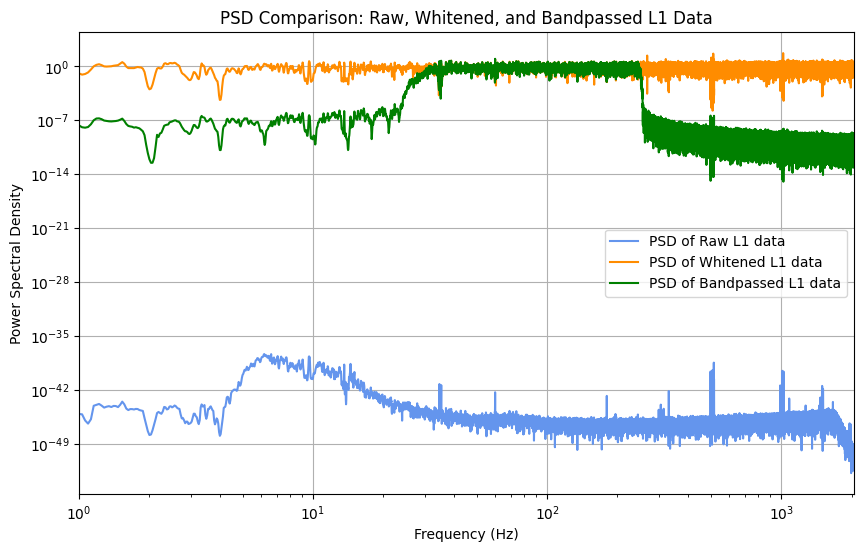

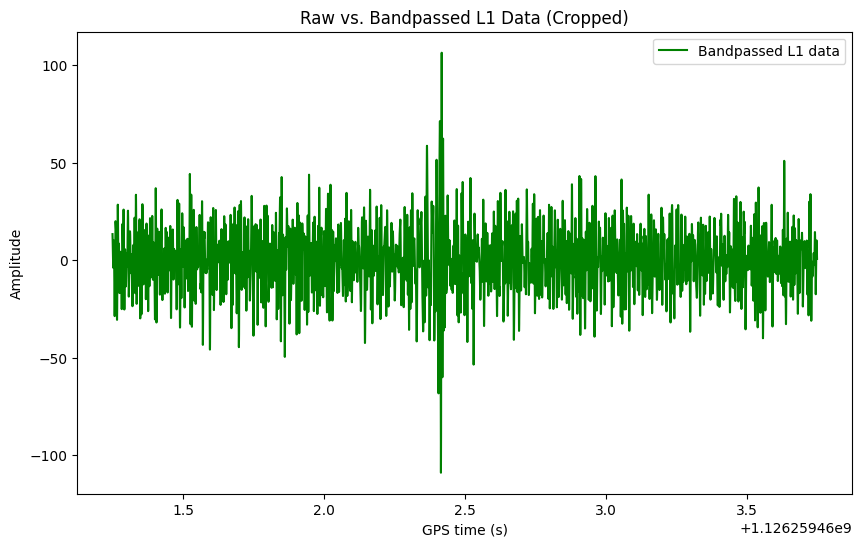

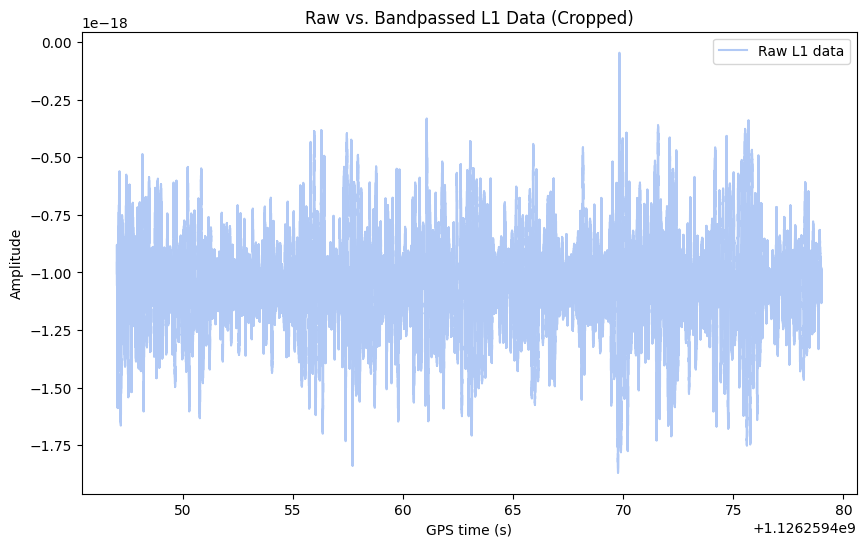

In [ ]:
# prompt:  We can apply a low pass filter (
# lowpass_fir(frequency, order, beta=5.0, remove_corrupted=True)[source]
# Lowpass filter the time series using an FIR filtered generated from the ideal response passed through a kaiser window (beta = 5.0)
# Parameters:
#             Series (Time) – The time series to be low-passed.
#             frequency (float) – The frequency below which is suppressed.
#             order (int) – Number of corrupted samples on each side of the time series
#             beta (float) – Beta parameter of the kaiser window that sets the side lobe attenuation.
#             remove_corrupted ({True, boolean}) – If True, the region of the time series corrupted by the filtering is excised before returning. If false, the corrupted regions are not excised and the full time series is returned.
# )and a high pass filter (
# highpass_fir(frequency, order, beta=5.0, remove_corrupted=True)[source]
#     Highpass filter the time series using an FIR filtered generated from the ideal response passed through a kaiser window (beta = 5.0)
#     Parameters:
#             Series (Time) – The time series to be high-passed.
#             frequency (float) – The frequency below which is suppressed.
#             order (int) – Number of corrupted samples on each side of the time series
#             beta (float) – Beta parameter of the kaiser window that sets the side lobe attenuation.
#             remove_corrupted ({True, boolean}) – If True, the region of the time series corrupted by the filtering is excised before returning. If false, the cor)to limit the frequency of the data. The low pass filters above 250 Hz (order=512) and the high pass filters below 30 Hz (order=512).
#     Estimate the PSD of the bandpassed data and plot it together with the raw PSD and the whitened PSD. What is the bandpass doing?
#     Plot the bandpassed data cropping 12s on the left and 13s on the right. What can you see? Compare this to the raw data. What frequencies dominate in each case? use whitened data

# Apply low-pass and high-pass filters
lowpassed_data = whitened_data.lowpass_fir(250, 512)
bandpassed_data = lowpassed_data.highpass_fir(30, 512)

# Estimate the PSD of the bandpassed data
bandpassed_psd = bandpassed_data.filter_psd(bandpassed_data.duration, delta_f, 1)

# Plot the PSDs
plt.figure(figsize=(10, 6))
plt.loglog(plot_frequencies, plot_psd, label='PSD of Raw L1 data', color='cornflowerblue')
plt.loglog(plot_frequencies, whitened_psd[indices], label='PSD of Whitened L1 data', color='darkorange')
plt.loglog(plot_frequencies, bandpassed_psd[indices], label='PSD of Bandpassed L1 data', color='green')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density')
plt.title('PSD Comparison: Raw, Whitened, and Bandpassed L1 Data')
plt.xlim(fmin, fmax)
plt.grid(True)
plt.legend()
plt.show()


# Crop and plot the bandpassed data
cropped_bandpassed_data = bandpassed_data.crop(12, 13)

plt.figure(figsize=(10, 6))
plt.plot(cropped_bandpassed_data.sample_times, cropped_bandpassed_data, label='Bandpassed L1 data', color='green')
plt.xlabel('GPS time (s)')
plt.ylabel('Amplitude')
plt.title('Raw vs. Bandpassed L1 Data (Cropped)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(data.sample_times, data, label='Raw L1 data', color='cornflowerblue', alpha=0.5) # Plot raw data with reduced opacity
plt.xlabel('GPS time (s)')
plt.ylabel('Amplitude')
plt.title('Raw vs. Bandpassed L1 Data (Cropped)')
plt.legend()
plt.show()


**Exercise 5:** Last but not least, we generate a spectrogram (time-frequency representation) using [this](https://pycbc.org/pycbc/latest/html/pycbc.types.html#pycbc.types.timeseries.TimeSeries.qtransform) function.

_Hint_: logfsteps=200, qrange=(110, 110), frange=(20, 512), vmax=3.5 as it is standard

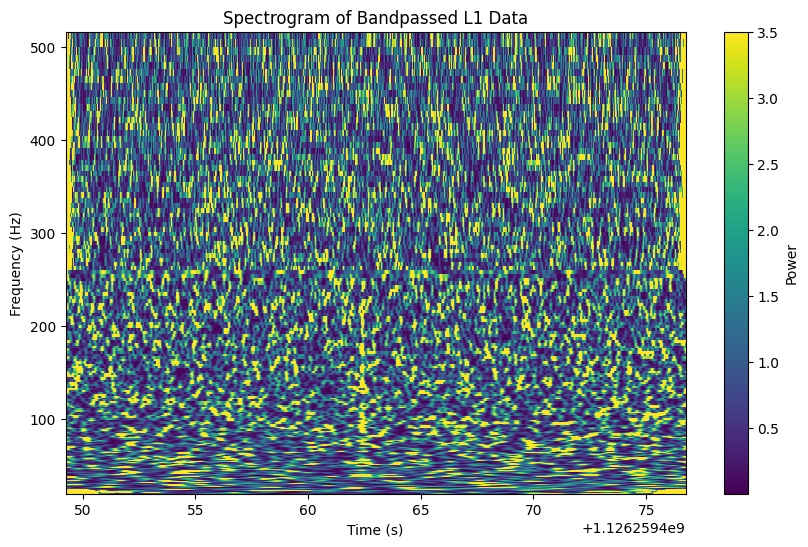

In [ ]:
# prompt: Last but not least, we generate a spectrogram (time-frequency representation) using this ( qtransform(delta_t=None, delta_f=None, logfsteps=None, frange=None, qrange=(4, 64), mismatch=0.2, return_complex=False)[source]
#     Return the interpolated 2d qtransform of this data
#     Parameters:
#             delta_t ({self.delta_t, float}) – The time resolution to interpolate to
#             delta_f (float, Optional) – The frequency resolution to interpolate to
#             logfsteps (int) – Do a log interpolation (incompatible with delta_f option) and set the number of steps to take.
#             frange ({(30, nyquist*0.8), tuple of ints}) – frequency range
#             qrange ({(4, 64), tuple}) – q range
#             mismatch (float) – Mismatch between frequency tiles
#             return_complex ({False, bool}) – return the raw complex series instead of the normalized power.
#     Returns:
#             times (numpy.ndarray) – The time that the qtransform is sampled.
#             freqs (numpy.ndarray) – The frequencies that the qtransform is sampled.
#             qplane (numpy.ndarray (2d)) – The two dimensional interpolated qtransform of this time series.
# )function.
# Hint: logfsteps=200, qrange=(110, 110), frange=(20, 512), vmax=3.5 as it is standard

# Generate the spectrogram
times, freqs, power = bandpassed_data.qtransform(logfsteps=200, qrange=(110, 110), frange=(20, 512))

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, freqs, power, vmax=3.5, cmap='viridis')
plt.colorbar(label='Power')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of Bandpassed L1 Data')
plt.show()


As we have seen, the detector has a given "noise budget" given  by the power spectral density (PSD), $S_{n}(f)$, according to its specific design. Let's see how the detectors will improve in the next observing runs.

**Bonus track:** From the `sensitivity_curves` folder [load](https://pycbc.org/pycbc/latest/html/pycbc.psd.html#pycbc.psd.read.from_txt) the PSD s:

- Third observing run of H1: `aligo_O3actual_H1.txt`
- Third observing run of L1: `aligo_O3actual_L1.txt`
- Third observing run of V1: `avirgo_O3actual.txt`
- Simulated fourth observing run of LIGO: `aligo_O4high.txt`

Note that these PSDs are from [LIGO public website](https://dcc.ligo.org/ligo-t2000012/public). Also read the PSD of [Einstein Telescope](https://pycbc.org/pycbc/latest/html/pycbc.psd.html#pycbc.psd.analytical.EinsteinTelescopeP1600143) (ET) and [Cosmic Explorer](https://pycbc.org/pycbc/latest/html/pycbc.psd.html#pycbc.psd.analytical.CosmicExplorerP1600143) (CE)

Plot all these PSDs. What can you say about ET and CE improvements?

_Hint_: Minimum frequency is 10 Hz, sampling rate 8192 Hz and duration is 16s.


Good job! This is the end of the second part. Maybe you can go for a break?

In [ ]:
import os
print(os.getcwd())

/content


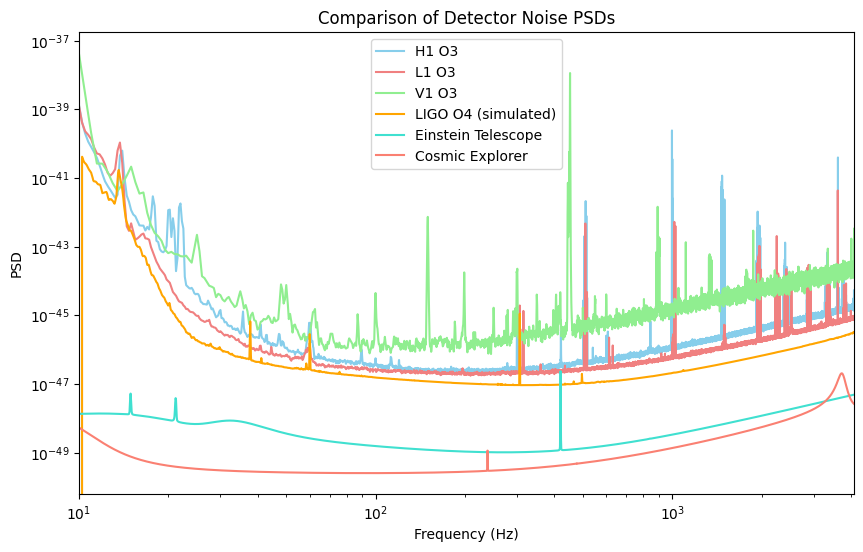

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pycbc.psd

# Define parameters
fmin = 10.0  # Min frequency
delta_f = 1.0 / 16  # Frequency resolution
sampling_rate = 8192
duration = 16
flen = int(sampling_rate * duration)

# Load PSDs from files
psd_h1_o3 = pycbc.psd.read.from_txt("sensitivity_curves/aligo_O3actual_H1.txt", flen, delta_f, fmin)
psd_l1_o3 = pycbc.psd.read.from_txt("sensitivity_curves/aligo_O3actual_L1.txt", flen, delta_f, fmin)
psd_v1_o3 = pycbc.psd.read.from_txt("sensitivity_curves/avirgo_O3actual.txt", flen, delta_f, fmin)
psd_ligo_o4 = pycbc.psd.read.from_txt("sensitivity_curves/aligo_O4high.txt", flen, delta_f, 10.3)

# Create Einstein Telescope and Cosmic Explorer PSDs
psd_et = pycbc.psd.analytical.EinsteinTelescopeP1600143(flen, delta_f, fmin)  # <- Fixed line
psd_ce = pycbc.psd.analytical.CosmicExplorerP1600143(flen, delta_f, fmin)  # <- Fixed line

# Plot all PSDs
plt.figure(figsize=(10, 6))
plt.loglog(psd_h1_o3.sample_frequencies, psd_h1_o3, label='H1 O3', color='skyblue')
plt.loglog(psd_l1_o3.sample_frequencies, psd_l1_o3, label='L1 O3', color='lightcoral')
plt.loglog(psd_v1_o3.sample_frequencies, psd_v1_o3, label='V1 O3', color='lightgreen')
plt.loglog(psd_ligo_o4.sample_frequencies, psd_ligo_o4, label='LIGO O4 (simulated)', color='orange')
plt.loglog(psd_et.sample_frequencies, psd_et, label='Einstein Telescope', color='turquoise')
plt.loglog(psd_ce.sample_frequencies, psd_ce, label='Cosmic Explorer', color='salmon')

# Axis settings
plt.xlim(10, sampling_rate / 2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.title('Comparison of Detector Noise PSDs')
plt.legend()
plt.show()
